#TAREA  5: REDES NEURONALES PARA CLASIFICACIÓN EN PYTHON

# Variables cuantitativas de entrada

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [34]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving fetal2020.csv to fetal2020 (1).csv


In [36]:
import io
tabla = pd.read_csv(io.BytesIO(uploaded['fetal2020 (1).csv']), sep = ",", index_col=0, encoding='latin-1')
# tabla = pd.read_csv(io.BytesIO(uploaded['natalidad.csv']), sep = ";", index_col=0, encoding='latin-1')
tabla.head(4)

<ipython-input-36-56a53f41335f>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  tabla = pd.read_csv(io.BytesIO(uploaded['fetal2020 (1).csv']), sep = ",", index_col=0, encoding='latin-1')


,COD_MUNIC,A_DEFUN,SIT_DEFUN,OTRSITIODE,TIPO_DEFUN,ANO,MES,HORA,MINUTOS,SEXO,...,C_MUERTEB,C_MUERTEC,C_MUERTED,C_MUERTEE,ASIS_MED,CAUSA_MULT,C_BAS1,CAUSA_667,IDPROFCER,CAU_HOMOL
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
70,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,1,...,1.0,NaN,NaN,NaN,1,P059/P011,P011,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80


In [37]:
df = tabla[["SEXO", "P_PMAN_IRIS", "PESO_NAC", "T_GES"]]
df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(str)
df.head(4)

<ipython-input-37-34b7e6819ba8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(str)


,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES
COD_DPTO,,,,
70,3,nan,9,1
11,3,0.0,1,1
11,1,0.0,1,2
11,3,nan,1,1


In [38]:
df.loc[(df.P_PMAN_IRIS == "nan"), 'P_PMAN_IRIS'] = "6"
df.head(2)

,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES
COD_DPTO,,,,
70,3,6,9,1
11,3,0.0,1,1


In [39]:
# from sklearn.impute import SimpleImputer
# simple = SimpleImputer(strategy='most_frequent')
# df = simple.fit_transform(df)
df = pd.DataFrame(df, columns = ["SEXO", "P_PMAN_IRIS", "PESO_NAC", "T_GES"])
df.head(4)

,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES
COD_DPTO,,,,
70,3,6,9,1
11,3,0.0,1,1
11,1,0.0,1,2
11,3,6,1,1


In [59]:
# df["SEXO"] = df.SEXO.astype(str)
# df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(str)
# df["PESO_NAC"] = df.PESO_NAC.astype(str)
# df["T_GES"] = df.T_GES.astype(str)
df["ASIS_MED"] = df.ASIS_MED.astype(str)
df.head(4)

AttributeError: ignored

In [60]:
# df.loc[(df.SEXO == "3.0"), 'SEXO'] = "Indeterminado"
# df.loc[(df.SEXO == "1.0"), 'SEXO'] = "Masculino"
# df.loc[(df.SEXO == "2.0"), 'SEXO'] = "Femenino"
df.loc[(df.ASIS_MED == "3"), 'ASIS_MED'] = "Ignorado"
df.loc[(df.ASIS_MED == "1"), 'ASIS_MED'] = "Si"
df.loc[(df.ASIS_MED == "2"), 'ASIS_MED'] = "No"
print(df)

AttributeError: ignored

In [43]:
x = df.drop("PESO_NAC", axis=1)
y = df["PESO_NAC"]
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)
trainX

,SEXO,P_PMAN_IRIS,T_GES
COD_DPTO,,,
86,3,6,1
25,3,0.0,1
11,3,6,9
5,3,6,1
5,3,6,1
...,...,...,...
54,3,6,1
70,3,6,1
11,2,6,1


In [62]:
sc=StandardScaler()
# scaler = sc.fit(trainX)
# trainX_scaled = scaler.transform(trainX)
# testX_scaled = scaler.transform(testX)
import random
#Numero de capas ocultas
CO = random.sample(range(3, 25), k=1)
#Numero de nodos
NN = random.sample(range(3, 25), k=1)
CO, NN

([19], [19])

# Variables cualitativas de entrada
La forma correcta de analizar las variables. Como son variables cualitativas, podemos transformar cada variable cualitativa en un conjunto de variables Dummie.

In [46]:
dummi1 = pd.get_dummies(x['SEXO'], dtype=float)
dummi1.columns = ['Masc', 'Fem', 'Desc']
dummi2 = pd.get_dummies(x['P_PMAN_IRIS'], dtype=float)
dummi2.columns = ["Natural", "Homicidio", "Accidente", "Pendiente", "Indeterminado", "Desconocido", "Guerra"]
dummi4 = pd.get_dummies(x['T_GES'], dtype=float)
dummi4.columns = ["< 22 sem", "22-27 sem", "28-37 sem", "38-41 sem", "> 42 sem", "Sin info"]
dummi = pd.concat([dummi1, dummi2,  dummi4,y], axis=1)
dummi.head(4)

,Masc,Fem,Desc,Natural,Homicidio,Accidente,Pendiente,Indeterminado,Desconocido,Guerra,< 22 sem,22-27 sem,28-37 sem,38-41 sem,> 42 sem,Sin info,PESO_NAC
COD_DPTO,,,,,,,,,,,,,,,,,
70,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9
11,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
11,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [47]:
x1 = dummi.drop("PESO_NAC", axis=1)
x1
y1 = dummi["PESO_NAC"]
y1.columns = ["< 1 Kg", "1-1.5 Kg", "1.5-2 Kg", "2-2.5 Kg", "2.5-3 Kg", "3-3.5 Kg", "3.5-4 Kg", "> 4 Kg", "Kg desco"]
train1, test1, train2, test2 = train_test_split(x1, y1, test_size = 0.3)
train1

,Masc,Fem,Desc,Natural,Homicidio,Accidente,Pendiente,Indeterminado,Desconocido,Guerra,< 22 sem,22-27 sem,28-37 sem,38-41 sem,> 42 sem,Sin info
COD_DPTO,,,,,,,,,,,,,,,,
11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
76,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
86,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [63]:
mlp_clf1 = MLPClassifier(hidden_layer_sizes=(19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19),
                         max_iter = 500,activation = 'relu',
                         solver = 'adam')
df.head(4)
mlp_clf1.fit(train1, train2)

MLPClassifier(hidden_layer_sizes=(19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
                                  19, 19, 19, 19, 19, 19, 19, 19),
              max_iter=500)

In [49]:
y_pred1 =  pd.DataFrame(mlp_clf1.predict(test1))
y_pred1.columns = ["aa"]
print('Exactitud: {:.2f}'.format(accuracy_score(test2, y_pred1)))

Exactitud: 0.75


In [50]:
#no_obs = np.array([[1.0,	1.0,	4.0]])
#mlp_clf1.predict(no_obs)


from sklearn.metrics import confusion_matrix
import pylab as pl

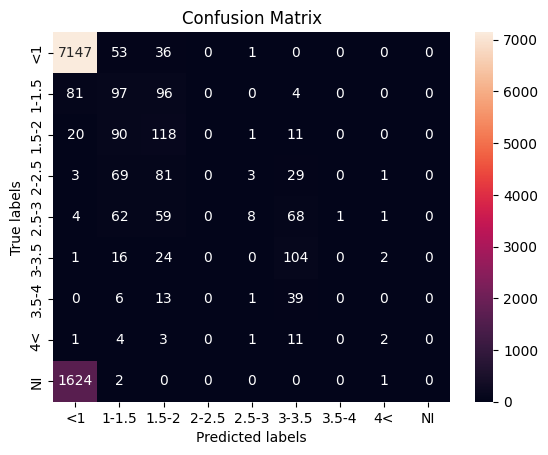

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(test2, y_pred1)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(["<1", "1-1.5", "1.5-2", "2-2.5", "2.5-3", "3-3.5", "3.5-4", "4<", "NI"]);
ax.yaxis.set_ticklabels(["<1", "1-1.5", "1.5-2", "2-2.5", "2.5-3", "3-3.5", "3.5-4", "4<", "NI"]);

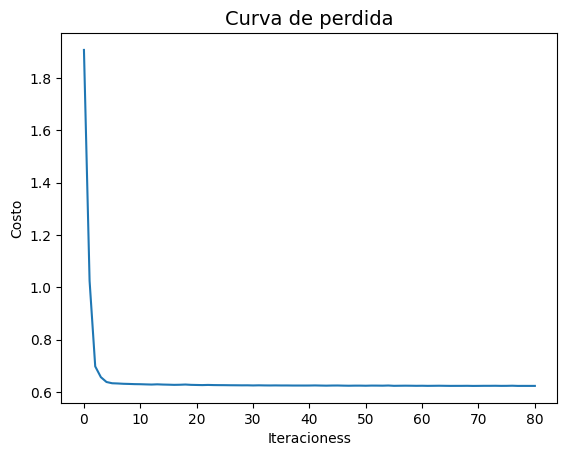

In [53]:
plt.plot(mlp_clf1.loss_curve_)
plt.title("Curva de perdida", fontsize=14)
plt.xlabel('Iteracioness')
plt.ylabel('Costo')
plt.show()

In [52]:
no_obs1 = np.array([
    [1, 0, 1,
     1, 0,0, 0, 0, 0,0,
     0 ,0, 0, 1, 0, 0]])
#['Masc', 'Fem', 'Desc']
#["Natural", "Homicidio", "Accidente", "Pendiente", "Indeterminado", "Desconocido, otro"
# ["< 22 sem", "22-27 sem", "28-37 sem", "38-41 sem", "> 42 sem", "Sin info"]

#Respuesta
#["<1", "1-1.5", "1.5-2", "2-2.5", "2.5-3", "3-3.5", "3.5-4", "4<", "NI"]
mlp_clf1.predict(no_obs1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array([5])

In [64]:
mlp_clf2 = MLPClassifier(hidden_layer_sizes=(19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19),
                         max_iter = 500,activation = 'relu',
                         solver = 'adam')
df.head(4)
mlp_clf2.fit(train1, train2)


MLPClassifier(hidden_layer_sizes=(19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
                                  19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
                                  19, 19, 19, 19, 19, 19, 19, 19, ...),
              max_iter=500)

In [65]:
y_pred2 =  pd.DataFrame(mlp_clf2.predict(test1))
y_pred2.columns = ["aa"]
print('Exactitud: {:.2f}'.format(accuracy_score(test2, y_pred2)))


Exactitud: 0.72


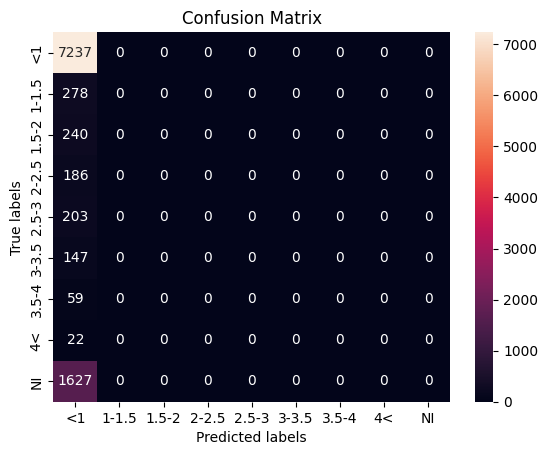

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(test2, y_pred2)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(["<1", "1-1.5", "1.5-2", "2-2.5", "2.5-3", "3-3.5", "3.5-4", "4<", "NI"]);
ax.yaxis.set_ticklabels(["<1", "1-1.5", "1.5-2", "2-2.5", "2.5-3", "3-3.5", "3.5-4", "4<", "NI"]);

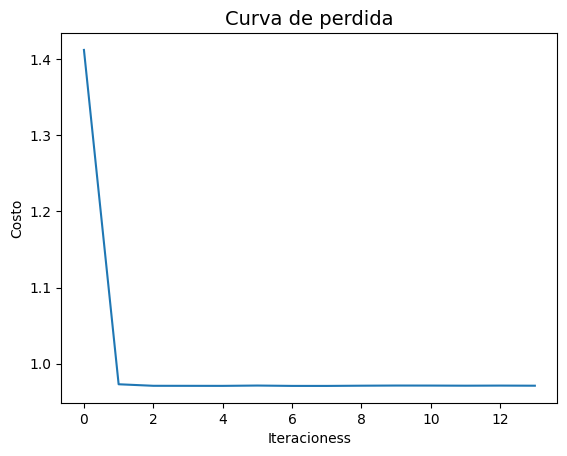

In [67]:
plt.plot(mlp_clf2.loss_curve_)
plt.title("Curva de perdida", fontsize=14)
plt.xlabel('Iteracioness')
plt.ylabel('Costo')
plt.show()

En el primer método la convergencia es mejor que la del segundo, esto se debe a que la exactitud del primero es de 0.75 y el segundo de 0.73.
También, la curva de pérdida del segundo término converge demasiado rápido al llegar al mínimo al primer paso, y lo que buscamos es que se demore al rededor de 20 - 40 pasos para un buen ajuste.